In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ed-hospital-administration/HA Data.csv


# Background:
**Scenario:** You are a data analyst in a large hospital's administration department in Novartis, focusing on improving patient care while reducing unnecessary readmissions. Recently, the hospital has seen a spike in readmission rates, leading to increased healthcare costs and indicating potential quality of care issues. The administration is concerned about the impact on patient outcomes and the hospital's reputation. Your task is to analyze hospital admission data to identify patterns and factors associated with high readmission rates.


# Problem Statement
Addressing high readmission rates is crucial for enhancing patient care quality, optimizing hospital resource allocation, and complying with healthcare regulations. Identifying the underlying causes can lead to targeted interventions, improved patient outcomes, and potentially significant cost savings.




# Data Link
https://www.kaggle.com/datasets/shivavashishtha/hospital-administration-data/


# Data Dictionary

1. encounter_id: Unique identifier of an encounter
2. patient_id: Unique identifier of a patient
3. race, gender, age: Demographic information
4. weight: Patient's weight (mostly missing, denoted by ?)
5. time_in_hospital: Length of hospital stay in days
6. medical_specialty: Specialty of the admitting physician
7. num_lab_procedures: Number of lab tests performed
8. num_procedures: Number of procedures (other than lab tests) performed
9. num_medications: Number of distinct medications prescribed
10.  number_outpatient, number_emergency, number_inpatient: Number of outpatient, emergency, and            inpatient visits in the year preceding the encounter
11. diag_1 to diag_5: Primary and secondary diagnoses codes
12. number_diagnoses: Number of diagnoses entered into the system
13. X1 to X25: Indicators for various medications (specifics not provided)
14. change: Indicates if there was a change in diabetic medications (Yes = change, No = no change)
    diabetesMed: Indicates if any diabetic medication was prescribed (Yes, No)
15. readmitted: Indicates if the patient was readmitted (<30 days = 1, else = 0)


In [2]:
Hospital=pd.read_csv('/kaggle/input/ed-hospital-administration/HA Data.csv')

In [3]:
Hospital 

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


In [4]:
Hospital.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [5]:
Hospital.tail()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0
66586,51312,153167502,81985473,Caucasian,Female,[80-90),?,2,?,38,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [6]:
Hospital.columns 

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
Hospital.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                      0
gender                    0
age                       0
weight                    0
time_in_hospital          0
medical_specialty         0
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    0
diag_2                    0
diag_3                    0
diag_4                    0
diag_5                    0
number_diagnoses          0
X1                    63104
X2                    55451
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [8]:
Hospital.select_dtypes(include='object').describe()

,race,gender,age,weight,medical_specialty,diag_1,diag_2,diag_3,diag_4,X1,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
count,66587,66587,66587,66587,66587,66587,66587,66587,66587,3483,...,66587,66587,66587,66587,66587,66587,66587,66587,66587,66587
unique,6,3,10,10,65,652,656,707,707,3,...,1,1,4,4,2,2,2,1,2,2
top,Caucasian,Female,[70-80),?,?,428,276,250,250,Norm,...,No,No,No,No,No,No,No,No,No,Yes
freq,49906,35973,17031,64454,32672,4564,4420,7499,7499,1643,...,66587,66587,31175,66110,66575,66586,66582,66587,35894,51205


In [9]:
Hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

**1. What is the distribution of readmission rates across different age groups?**

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.subplots as sp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['axes.facecolor'] = 'black'       
plt.rcParams['figure.facecolor'] = 'black'     
plt.rcParams['axes.edgecolor'] = 'white'       
plt.rcParams['grid.color'] = 'gray'            
plt.rcParams['xtick.color'] = 'white'          
plt.rcParams['ytick.color'] = 'white'          
plt.rcParams['axes.labelcolor'] = 'white'      
plt.rcParams['text.color'] = 'white'           
plt.rcParams['legend.facecolor'] = 'black'     
plt.rcParams['legend.edgecolor'] = 'white'

age
[0-10)        22
[10-20)      178
[20-30)      520
[30-40)     1016
[40-50)     2814
[50-60)     5129
[60-70)     6860
[70-80)     8179
[80-90)     5349
[90-100)     697
Name: readmitted, dtype: int64


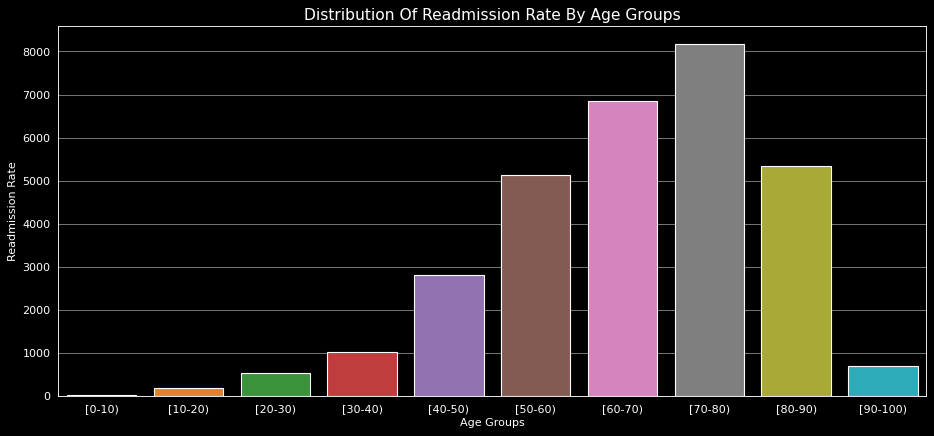

In [11]:
age_groups = Hospital.groupby('age')['readmitted'].sum()
print(age_groups)
plt.figure(figsize=(14,6), dpi=80, frameon=True)

sns.barplot(x=age_groups.index, y=age_groups.values, palette=None)
plt.title('Distribution Of Readmission Rate By Age Groups', size=14)
plt.ylabel('Readmission Rate')
plt.xlabel('Age Groups')
plt.show()

**2. Analyze the average length of hospital stays by medical specialty. Which specialties have the longest and shortest average stays?**

medical_specialty
Pediatrics-Pulmonology               10.687500
PhysicalMedicineandRehabilitation     8.891051
OutreachServices                      8.250000
Pathology                             8.111111
Psychiatry-Addictive                  8.000000
Name: time_in_hospital, dtype: float64


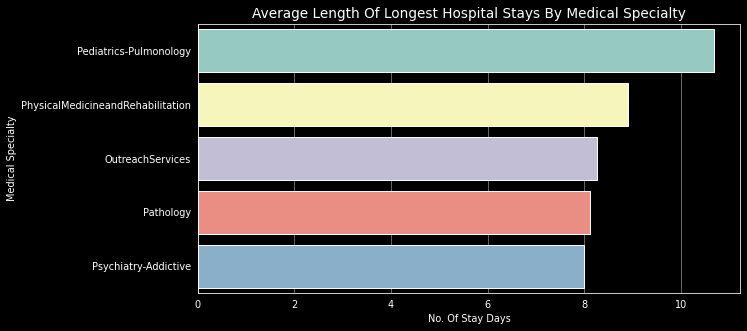

In [12]:
avg_stays = Hospital.groupby('medical_specialty')['time_in_hospital'].mean().sort_values(ascending=False).head()
print(avg_stays)
plt.figure(figsize=(10,5),dpi=70,frameon=True)
sns.barplot(x=avg_stays.values, y=avg_stays.index,palette='Set3')
plt.title('Average Length Of Longest Hospital Stays By Medical Specialty', size=14)
plt.xlabel('No. Of Stay Days', size=10)
plt.ylabel('Medical Specialty', size=10)
plt.show()

**3. Is there a significant difference in readmission rates between patients with changes in diabetic medication and those without?
**

In [26]:
changes_in_med = Hospital.groupby('change')['readmitted'].count()
print(changes_in_med)
colors=['gold', 'powderblue']

fig = px.pie(changes_in_med,
            values=changes_in_med.values,
            names=changes_in_med.index,
            title='Readmission Rates: Diabetic Med Changes vs. No Change',
            hole=0.5)

fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))

fig.update_traces(marker=dict(colors=colors))
fig.show()

change
Ch    30693
No    35894
Name: readmitted, dtype: int64


4. How do readmission rates vary by race and gender?


In [14]:
Hospital.race.value_counts()

race
Caucasian          49906
AfricanAmerican    12406
?                   1504
Hispanic            1313
Other               1050
Asian                408
Name: count, dtype: int64

In [15]:
Hospital['race'] = Hospital['race'].replace('?', 'NA')

In [16]:
Hospital.race.value_counts()

race
Caucasian          49906
AfricanAmerican    12406
NA                  1504
Hispanic            1313
Other               1050
Asian                408
Name: count, dtype: int64

5. Evaluate the impact of the number of medications prescribed on the length of hospital stay.

In [17]:
grouped_dt = Hospital.groupby('num_medications')['time_in_hospital'].mean().reset_index()

correlation = grouped_dt['num_medications'].corr(grouped_dt['time_in_hospital']).round(decimals=2)
print("\nCorrelation between Number Of Medications and Time in Hospital:", correlation)


Correlation between Number Of Medications and Time in Hospital: 0.94


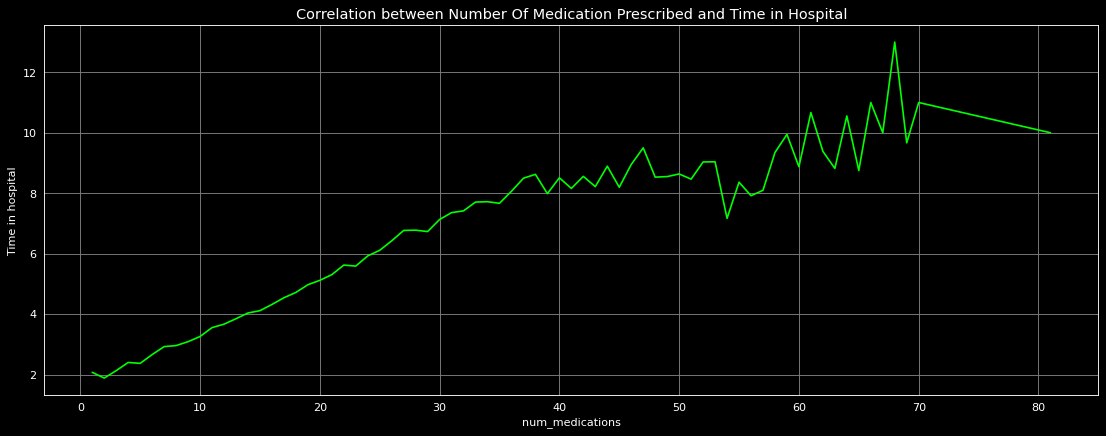

In [18]:
grouped_data = Hospital.groupby('num_medications')['time_in_hospital'].mean()
plt.figure(figsize=(17,6), dpi=80)
sns.lineplot(x=grouped_data.index, y=grouped_data.values, color='lime')
plt.title('Correlation between Number Of Medication Prescribed and Time in Hospital', size=13)
plt.ylabel('Time in hospital')
plt.show()

6. Investigate the relationship between the number of lab procedures performed during the stay and readmission rates.


In [19]:
Hospital.weight.unique()

array(['?', '[0-25)', '[75-100)', '[50-75)', '[25-50)', '[125-150)',
       '[150-175)', '[100-125)', '>200', '[175-200)'], dtype=object)

num_lab_pro_grp
1-10        3862
11-20       4044
21-30       6784
31-40      12380
41-50      14435
51-60      11409
61-70       7530
71-80       3068
81-90        846
91-100       193
101-110       27
111-120        3
121-130        1
Name: readmitted, dtype: int64


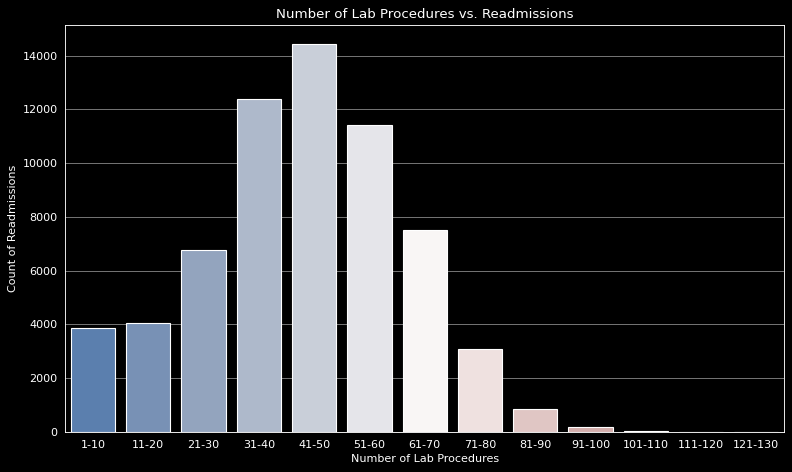

In [20]:
bins = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 130]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120', '121-130']

Hospital['num_lab_pro_grp'] = pd.cut(Hospital['num_lab_procedures'], 
                                     bins=bins, labels=labels)

num_lab_pro = Hospital.groupby('num_lab_pro_grp')['readmitted'].count()

print(num_lab_pro)

plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x=num_lab_pro.index, y=num_lab_pro.values, 
            palette='vlag')

plt.title('Number of Lab Procedures vs. Readmissions')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Count of Readmissions')
plt.tight_layout()
plt.show()

**7. What is the distribution of patients across different weight categories, and how does this relate to readmission rates?**

In [21]:
Hospital['weight'] = Hospital['weight'].replace('?', 'NA')

In [22]:
Hospital.weight.unique()

array(['NA', '[0-25)', '[75-100)', '[50-75)', '[25-50)', '[125-150)',
       '[150-175)', '[100-125)', '>200', '[175-200)'], dtype=object)

In [23]:
Hospital.groupby('weight')['readmitted'].count()

weight
>200             4
NA           64454
[0-25)          26
[100-125)      416
[125-150)      104
[150-175)       20
[175-200)        8
[25-50)         52
[50-75)        603
[75-100)       900
Name: readmitted, dtype: int64

**5. Is there a significant difference in readmission rates between patients with changes in diabetic medication and those without?**

In [25]:
changes_in_med = Hospital.groupby('change')['readmitted'].count()
print(changes_in_med)

colors=['gold', 'powderblue']

fig = px.pie(changes_in_med,
            values=changes_in_med.values,
            names=changes_in_med.index,
            title='Readmission Rates: Diabetic Med Changes vs. No Change',
            hole=0.5)

fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))

fig.update_traces(marker=dict(colors=colors))
fig.show()

change
Ch    30693
No    35894
Name: readmitted, dtype: int64
